<a href="https://colab.research.google.com/github/jayant2014/Stock-Prediction/blob/master/Stock_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [0]:
# Reading Yahoo Finance Data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 8, 31)
df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,206.490005
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,204.160004
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005


##Exploring Rolling Mean and Return Rate of Stocks##


In [7]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2019-08-19    197.160846
2019-08-20    197.391602
2019-08-21    197.632951
2019-08-22    197.859698
2019-08-23    197.960657
2019-08-26    198.086917
2019-08-27    198.186503
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
Name: Adj Close, dtype: float64

##Plot Moving Average with our Stocks Price Chart##

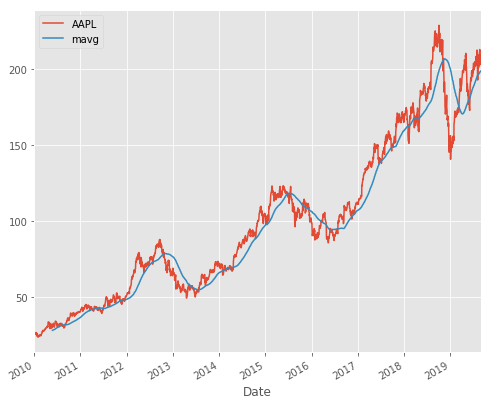

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## Return Deviation##

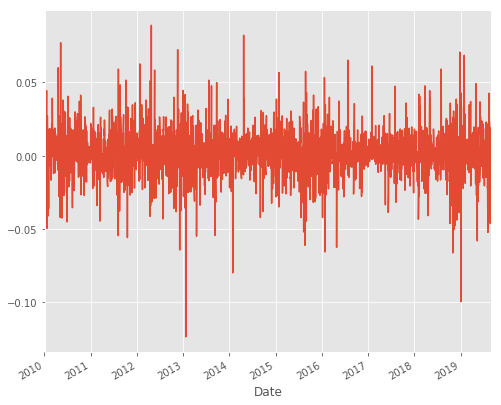

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

##Analyzing Competitors Stocks##

In [13]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-08-19,210.350006,8.67,1198.449951,135.039993,138.410004
2019-08-20,210.360001,8.38,1182.689941,133.000000,137.259995
2019-08-21,212.639999,8.16,1191.250000,134.250000,138.789993
2019-08-22,212.460007,8.19,1189.530029,134.320007,137.779999
2019-08-23,202.639999,7.97,1151.290039,129.570007,133.389999
2019-08-26,206.490005,8.05,1168.890015,129.990005,135.449997
2019-08-27,204.160004,7.93,1167.839966,131.169998,135.740005
2019-08-28,205.529999,7.94,1171.020020,132.759995,135.559998
2019-08-29,209.009995,8.11,1192.849976,134.880005,138.119995


##Correlation Analysis##

In [14]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.321120,0.462883,0.385814,0.457645
GE,0.321120,1.000000,0.332410,0.437868,0.361923
GOOG,0.462883,0.332410,1.000000,0.406329,0.538604
IBM,0.385814,0.437868,0.406329,1.000000,0.491927
MSFT,0.457645,0.361923,0.538604,0.491927,1.000000


**Lets plot APPLE and GE with ScatterPlot to view their return distributions**

Text(0, 0.5, 'Returns GE')

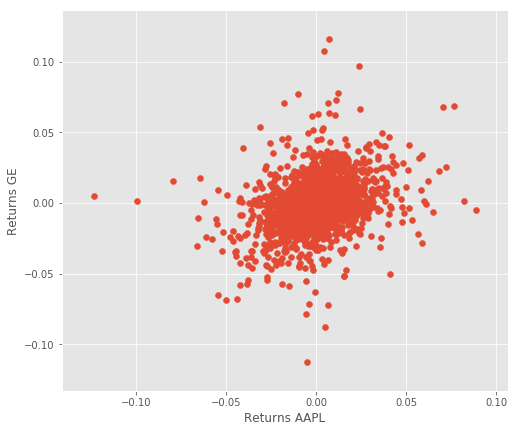

In [16]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

**Plotting the scatter_matrix to visualize possible correlations among competing stocks**

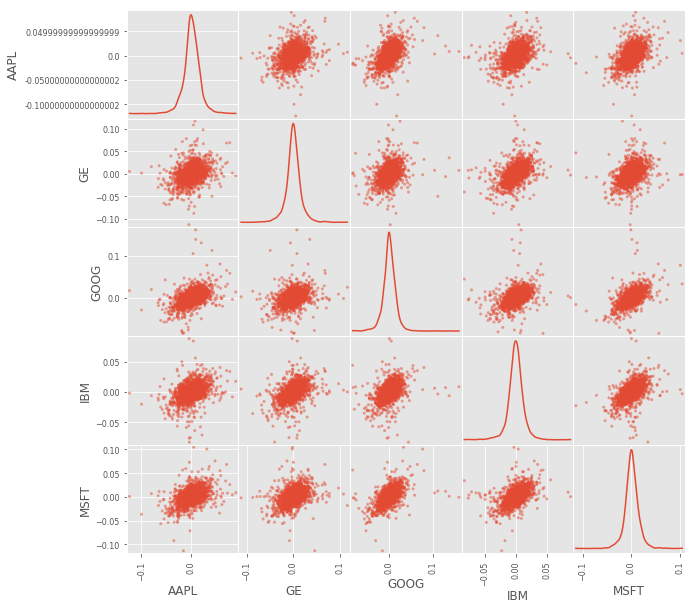

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

##Heatmap##

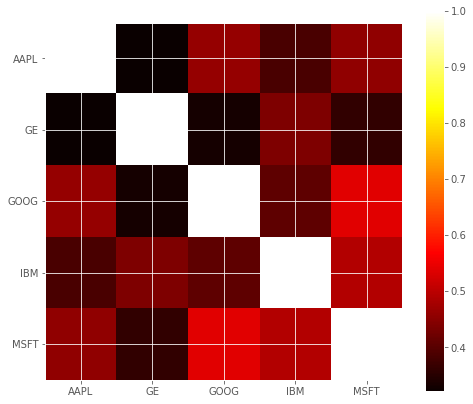

In [20]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

##Stocks Return Rate and Risk##

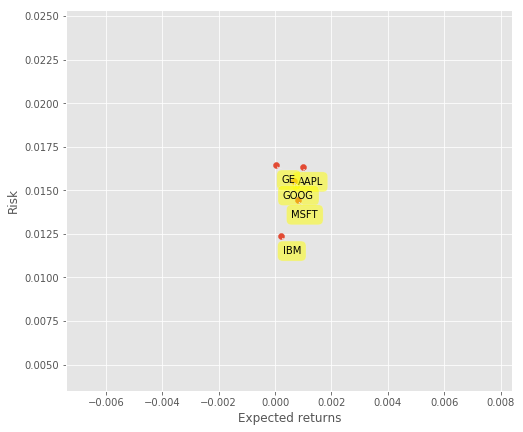

In [21]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

##Predicting Stock Prices##

**Feature Engineering**

In [26]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail(10)

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-08-19,210.350006,24413600.0,1.283574,-0.128188
2019-08-20,210.360001,26884300.0,1.440387,-0.246588
2019-08-21,212.639999,21535400.0,0.964065,-0.164330
2019-08-22,212.460007,22253700.0,1.736799,-0.342416
2019-08-23,202.639999,46818000.0,5.453022,-3.242130
2019-08-26,206.490005,26043600.0,1.031529,0.306036
2019-08-27,204.160004,25873300.0,2.458858,-1.780043
2019-08-28,205.529999,15938800.0,1.167710,0.700633
2019-08-29,209.009995,20990500.0,1.272668,0.244602


##Pre-processing and Cross Validation##

In [0]:
import math
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

**Drop missing values**

In [0]:
dfreg.fillna(value=-99999, inplace=True)

**We want to separate 1 percent of the data to forecast**

In [0]:
forecast_out = int(math.ceil(0.01 * len(dfreg)))

**Separating the label here, we want to predict the AdjClose**

In [0]:
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

**Scale the X so that everyone can have the same distribution for linear regression**

In [0]:
X = preprocessing.scale(X)

**Finally We want to find Data Series of late X and early X (train) for model generation and evaluation**

In [0]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

**Separate label and identify it as y**

In [0]:
y = np.array(dfreg['label'])
y = y[:-forecast_out]

**Test train split**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Generation##

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##Simple Linear Regression##

**Linear Regression**

In [64]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

**Quadratic Regression 2**

In [65]:
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

**Quadratic Regression 3**

In [66]:
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

**KNN Regression**

In [67]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

##Evaluation##

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [72]:
print('Confidence Score using Linear Regression : ' , confidencereg)
print('Confidence Score using Quadratic Regression 2 : ' , confidencepoly2)
print('Confidence Score using Quadratic Regression 3 : ' , confidencepoly3)
print('Confidence Score using KNN Regression : ' , confidenceknn)

Confidence Score using Linear Regression :  0.9630994289579008
Confidence Score using Quadratic Regression 2 :  0.963783633932309
Confidence Score using Quadratic Regression 3 :  0.9668543234656523
Confidence Score using KNN Regression :  0.949354321160913


##Sanity Testing##

In [0]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

##Plotting the Prediction##

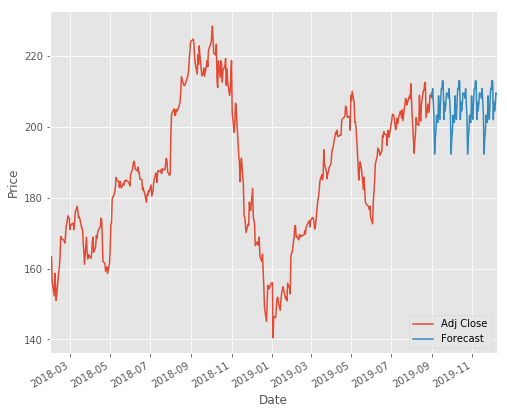

In [78]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()